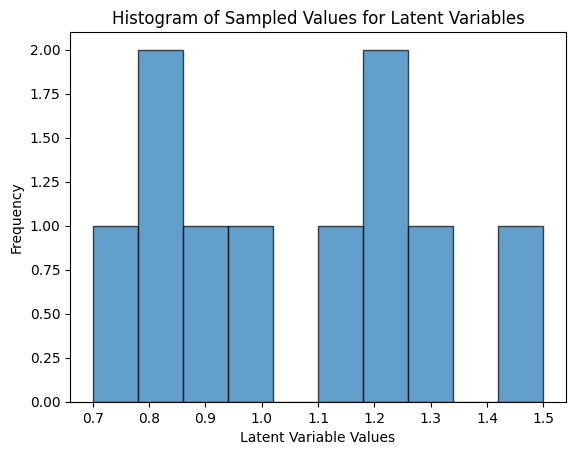

In [3]:
#数据采样直方图

import matplotlib.pyplot as plt

# Assume you have a set of sampled values for latent variables
samples = [0.8, 1.2, 1.0, 1.5, 0.9, 1.2, 0.7, 1.3, 1.1, 0.8]

# Set the parameters for the histogram
num_bins = 10  # Specify the number of bins
plt.hist(samples, bins=num_bins, edgecolor='k', alpha=0.7)

# Add labels and a title
plt.xlabel('Latent Variable Values')
plt.ylabel('Frequency')
plt.title('Histogram of Sampled Values for Latent Variables')

# Display the histogram
plt.show()


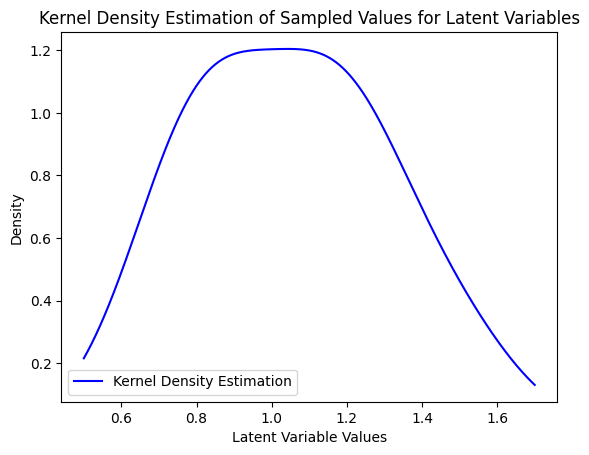

In [4]:
#数据核密度估计

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assume you have a set of sampled values for latent variables
samples = np.array([0.8, 1.2, 1.0, 1.5, 0.9, 1.2, 0.7, 1.3, 1.1, 0.8])

# Create a kernel density estimate object
kde = gaussian_kde(samples)

# Generate a set of values for plotting the estimate
x = np.linspace(min(samples) - 0.2, max(samples) + 0.2, 1000)

# Calculate the kernel density estimate
density_estimation = kde(x)

# Plot the kernel density estimate curve
plt.plot(x, density_estimation, label='Kernel Density Estimation', color='blue')

# Add labels and a title
plt.xlabel('Latent Variable Values')
plt.ylabel('Density')
plt.title('Kernel Density Estimation of Sampled Values for Latent Variables')

# Show the legend
plt.legend()

# Display the kernel density estimate plot
plt.show()


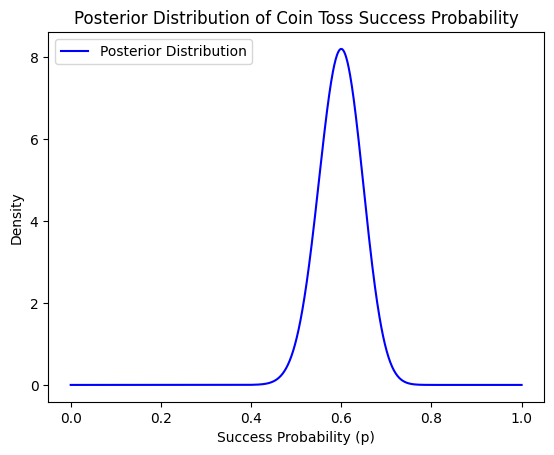

Posterior Mean: 0.5980392156862745
95% Credible Interval: (0.5017440784925653, 0.6906914843099456)


In [4]:
#贝叶斯用于计算硬币成功概率的后验分布

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Observational data: Suppose we toss a coin 100 times, and it lands heads 60 times.
N = 100
k = 60

# Bayesian update: Calculate the parameters of the posterior distribution
alpha_prior = 1  # Prior hyperparameter
beta_prior = 1   # Prior hyperparameter

alpha_posterior = alpha_prior + k
beta_posterior = beta_prior + (N - k)

# Create a Beta distribution object to represent the posterior distribution
posterior_distribution = beta(alpha_posterior, beta_posterior)

# Generate a set of probability values for plotting the posterior distribution
x = np.linspace(0, 1, 1000)
posterior_pdf = posterior_distribution.pdf(x)

# Plot the posterior distribution
plt.plot(x, posterior_pdf, label='Posterior Distribution', color='blue')
plt.xlabel('Success Probability (p)')
plt.ylabel('Density')
plt.title('Posterior Distribution of Coin Toss Success Probability')
plt.legend()
plt.show()

# Estimate the mean and 95% credible interval of the posterior distribution
mean_posterior = alpha_posterior / (alpha_posterior + beta_posterior)
credible_interval = posterior_distribution.interval(0.95)  # 95% credible interval
print("Posterior Mean:", mean_posterior)
print("95% Credible Interval:", credible_interval)


30.0


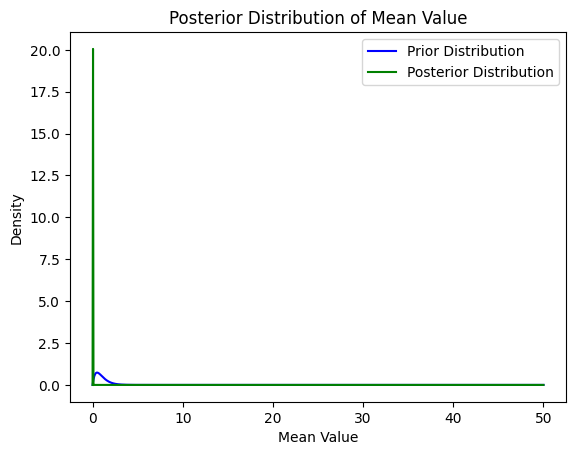

Posterior Mean: 0.04044117647058824
95% Credible Interval: (0.020188089585429555, 0.0676116030956536)


In [13]:
# 使用 Gamma 先验时，通常是为了估计正值参数的分布，比如数据的总和或平均值。以下是Gamma 先验在贝叶斯分析中用于估计正值参数的分布

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Simulated dataset: Suppose we observe some positive data
data = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50])

# Sample mean of the observed data
sample_mean = np.mean(data)
print(sample_mean)

# Gamma prior parameters
alpha_prior = 2
beta_prior = 2

# Create a Gamma prior distribution object
prior_distribution = gamma(alpha_prior, scale=1/beta_prior)

# Generate a set of mean values for plotting the prior distribution
x = np.linspace(0, 50, 1000)
prior_pdf = prior_distribution.pdf(x)

# Bayesian update: Calculate the posterior distribution parameters
alpha_posterior = alpha_prior + len(data)
beta_posterior = beta_prior + np.sum(data)

# Create a Gamma posterior distribution object
posterior_distribution = gamma(alpha_posterior, scale=1/beta_posterior)

# Generate a set of mean values for plotting the posterior distribution
posterior_pdf = posterior_distribution.pdf(x)

# Plot the Gamma posterior distribution
plt.plot(x, prior_pdf, label='Prior Distribution', color='blue')
plt.plot(x, posterior_pdf, label='Posterior Distribution', color='green')
plt.xlabel('Mean Value')
plt.ylabel('Density')
plt.title('Posterior Distribution of Mean Value')
plt.legend()
plt.show()

# Estimate the posterior mean and 95% credible interval
mean_posterior = alpha_posterior / beta_posterior
credible_interval = posterior_distribution.interval(0.95)  # 95% credible interval
print("Posterior Mean:", mean_posterior)
print("95% Credible Interval:", credible_interval)


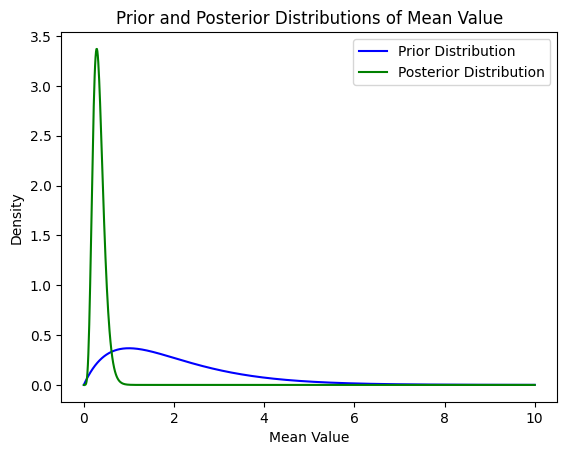

Posterior Mean: 0.3333333333333333
Posterior Mean: 0.3333333333333333
95% Credible Interval: (0.1340172881676127, 0.6218797153580325)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# Data: Suppose we have observed some positive data
data = np.array([2, 3, 4, 5, 6])

# Gamma prior parameters
alpha_prior = 2
beta_prior = 1

# Create a Gamma prior distribution object
prior_distribution = gamma(alpha_prior, scale=1/beta_prior)

# Calculate the posterior distribution parameters
alpha_posterior = alpha_prior + len(data)
beta_posterior = beta_prior + np.sum(data)

# Create a Gamma posterior distribution object
posterior_distribution = gamma(alpha_posterior, scale=1/beta_posterior)

# Generate a set of mean values for plotting the prior and posterior distributions
x = np.linspace(0, 10, 1000)
prior_pdf = prior_distribution.pdf(x)
posterior_pdf = posterior_distribution.pdf(x)

# Plot the prior and posterior distributions
plt.plot(x, prior_pdf, label='Prior Distribution', color='blue')
plt.plot(x, posterior_pdf, label='Posterior Distribution', color='green')
plt.xlabel('Mean Value')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions of Mean Value')
plt.legend()
plt.show()

# Estimate the posterior mean
mean_posterior = alpha_posterior / beta_posterior
print("Posterior Mean:", mean_posterior)

# Estimate the posterior mean and 95% credible interval
mean_posterior = alpha_posterior / beta_posterior
credible_interval = posterior_distribution.interval(0.95)  # 95% credible interval
print("Posterior Mean:", mean_posterior)
print("95% Credible Interval:", credible_interval)

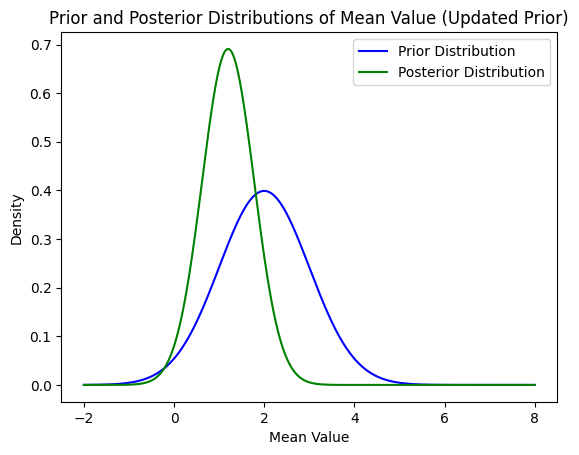

Posterior Mean: 1.2000000000000002


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data: Suppose we have observed some positive data
data = np.array([2, 3, 4, 5, 6])

# Updated Normal prior parameters with mean_prior=2
mean_prior = 2  # Mean of the prior
std_dev_prior = 1  # Standard deviation of the prior

# Create a Normal prior distribution object
prior_distribution = norm(loc=mean_prior, scale=std_dev_prior)

# Calculate the posterior distribution parameters
n = len(data)
mean_data = np.mean(data)
std_dev_data = np.std(data, ddof=1)  # Using Bessel's correction for sample standard deviation
std_dev_posterior = 1 / np.sqrt(1/std_dev_prior**2 + n/std_dev_data**2)
mean_posterior = (mean_prior / std_dev_prior**2 + mean_data / std_dev_data**2) * std_dev_posterior**2

# Create a Normal posterior distribution object
posterior_distribution = norm(loc=mean_posterior, scale=std_dev_posterior)

# Generate a set of mean values for plotting the prior and posterior distributions
x = np.linspace(-2, 8, 1000)
prior_pdf = prior_distribution.pdf(x)
posterior_pdf = posterior_distribution.pdf(x)

# Plot the prior and posterior distributions
plt.plot(x, prior_pdf, label='Prior Distribution', color='blue')
plt.plot(x, posterior_pdf, label='Posterior Distribution', color='green')
plt.xlabel('Mean Value')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions of Mean Value (Updated Prior)')
plt.legend()
plt.show()

# Estimate the posterior mean
print("Posterior Mean:", mean_posterior)


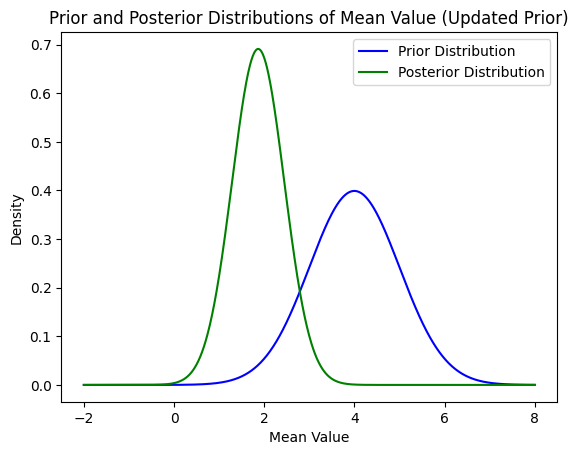

Posterior Mean: 1.8666666666666671


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Data: Suppose we have observed some positive data
data = np.array([2, 3, 4, 5, 6])

# Updated Normal prior parameters with mean_prior=4
mean_prior = 4  # Mean of the prior
std_dev_prior = 1  # Standard deviation of the prior

# Create a Normal prior distribution object
prior_distribution = norm(loc=mean_prior, scale=std_dev_prior)

# Calculate the posterior distribution parameters
n = len(data)
mean_data = np.mean(data)
std_dev_data = np.std(data, ddof=1)  # Using Bessel's correction for sample standard deviation
std_dev_posterior = 1 / np.sqrt(1/std_dev_prior**2 + n/std_dev_data**2)
mean_posterior = (mean_prior / std_dev_prior**2 + mean_data / std_dev_data**2) * std_dev_posterior**2

# Create a Normal posterior distribution object
posterior_distribution = norm(loc=mean_posterior, scale=std_dev_posterior)

# Generate a set of mean values for plotting the prior and posterior distributions
x = np.linspace(-2, 8, 1000)
prior_pdf = prior_distribution.pdf(x)
posterior_pdf = posterior_distribution.pdf(x)

# Plot the prior and posterior distributions
plt.plot(x, prior_pdf, label='Prior Distribution', color='blue')
plt.plot(x, posterior_pdf, label='Posterior Distribution', color='green')
plt.xlabel('Mean Value')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions of Mean Value (Updated Prior)')
plt.legend()
plt.show()

# Estimate the posterior mean
print("Posterior Mean:", mean_posterior)
